In [ ]:
%pip install ng_ai[networkx]

from ng_ai import NebulaReader
from ng_ai.config import NebulaGraphConfig

# read data with nebula/networkx engine, query mode
config_dict = {
    "graphd_hosts": "graphd:9669",
    "user": "root",
    "password": "nebula",
    "space": "k8s",
}
config = NebulaGraphConfig(**config_dict)
reader = NebulaReader(engine="nebula", config=config)
reader.query(edges=["rel"], props=[["verb"]])
g = reader.read()

In [2]:
g.show(5)

apisix-dashboard-b544bd766 -> apisix-dashboard-b544bd766-nh79j (0): {'verb': 'controls'}
apisix-dashboard-b544bd766-nh79j -> apisix-dashboard (0): {'verb': 'uses'}
apisix-ingress-controller-6ccdb9c8fc -> apisix-ingress-controller-6ccdb9c8fc-css8c (0): {'verb': 'controls'}
apisix-ingress-controller-6ccdb9c8fc-css8c -> apisix-configmap (0): {'verb': 'uses'}
cert-manager-76f6c4cd4c -> cert-manager-76f6c4cd4c-tnqrf (0): {'verb': 'controls'}


In [3]:
G = g.data

%pip install matplotlib

import networkx as nx
import matplotlib.pyplot as plt
import random


In [4]:
pr_result = g.algo.pagerank(reset_prob=0.15, max_iter=100)

In [5]:
louvain_result = g.algo.louvain()

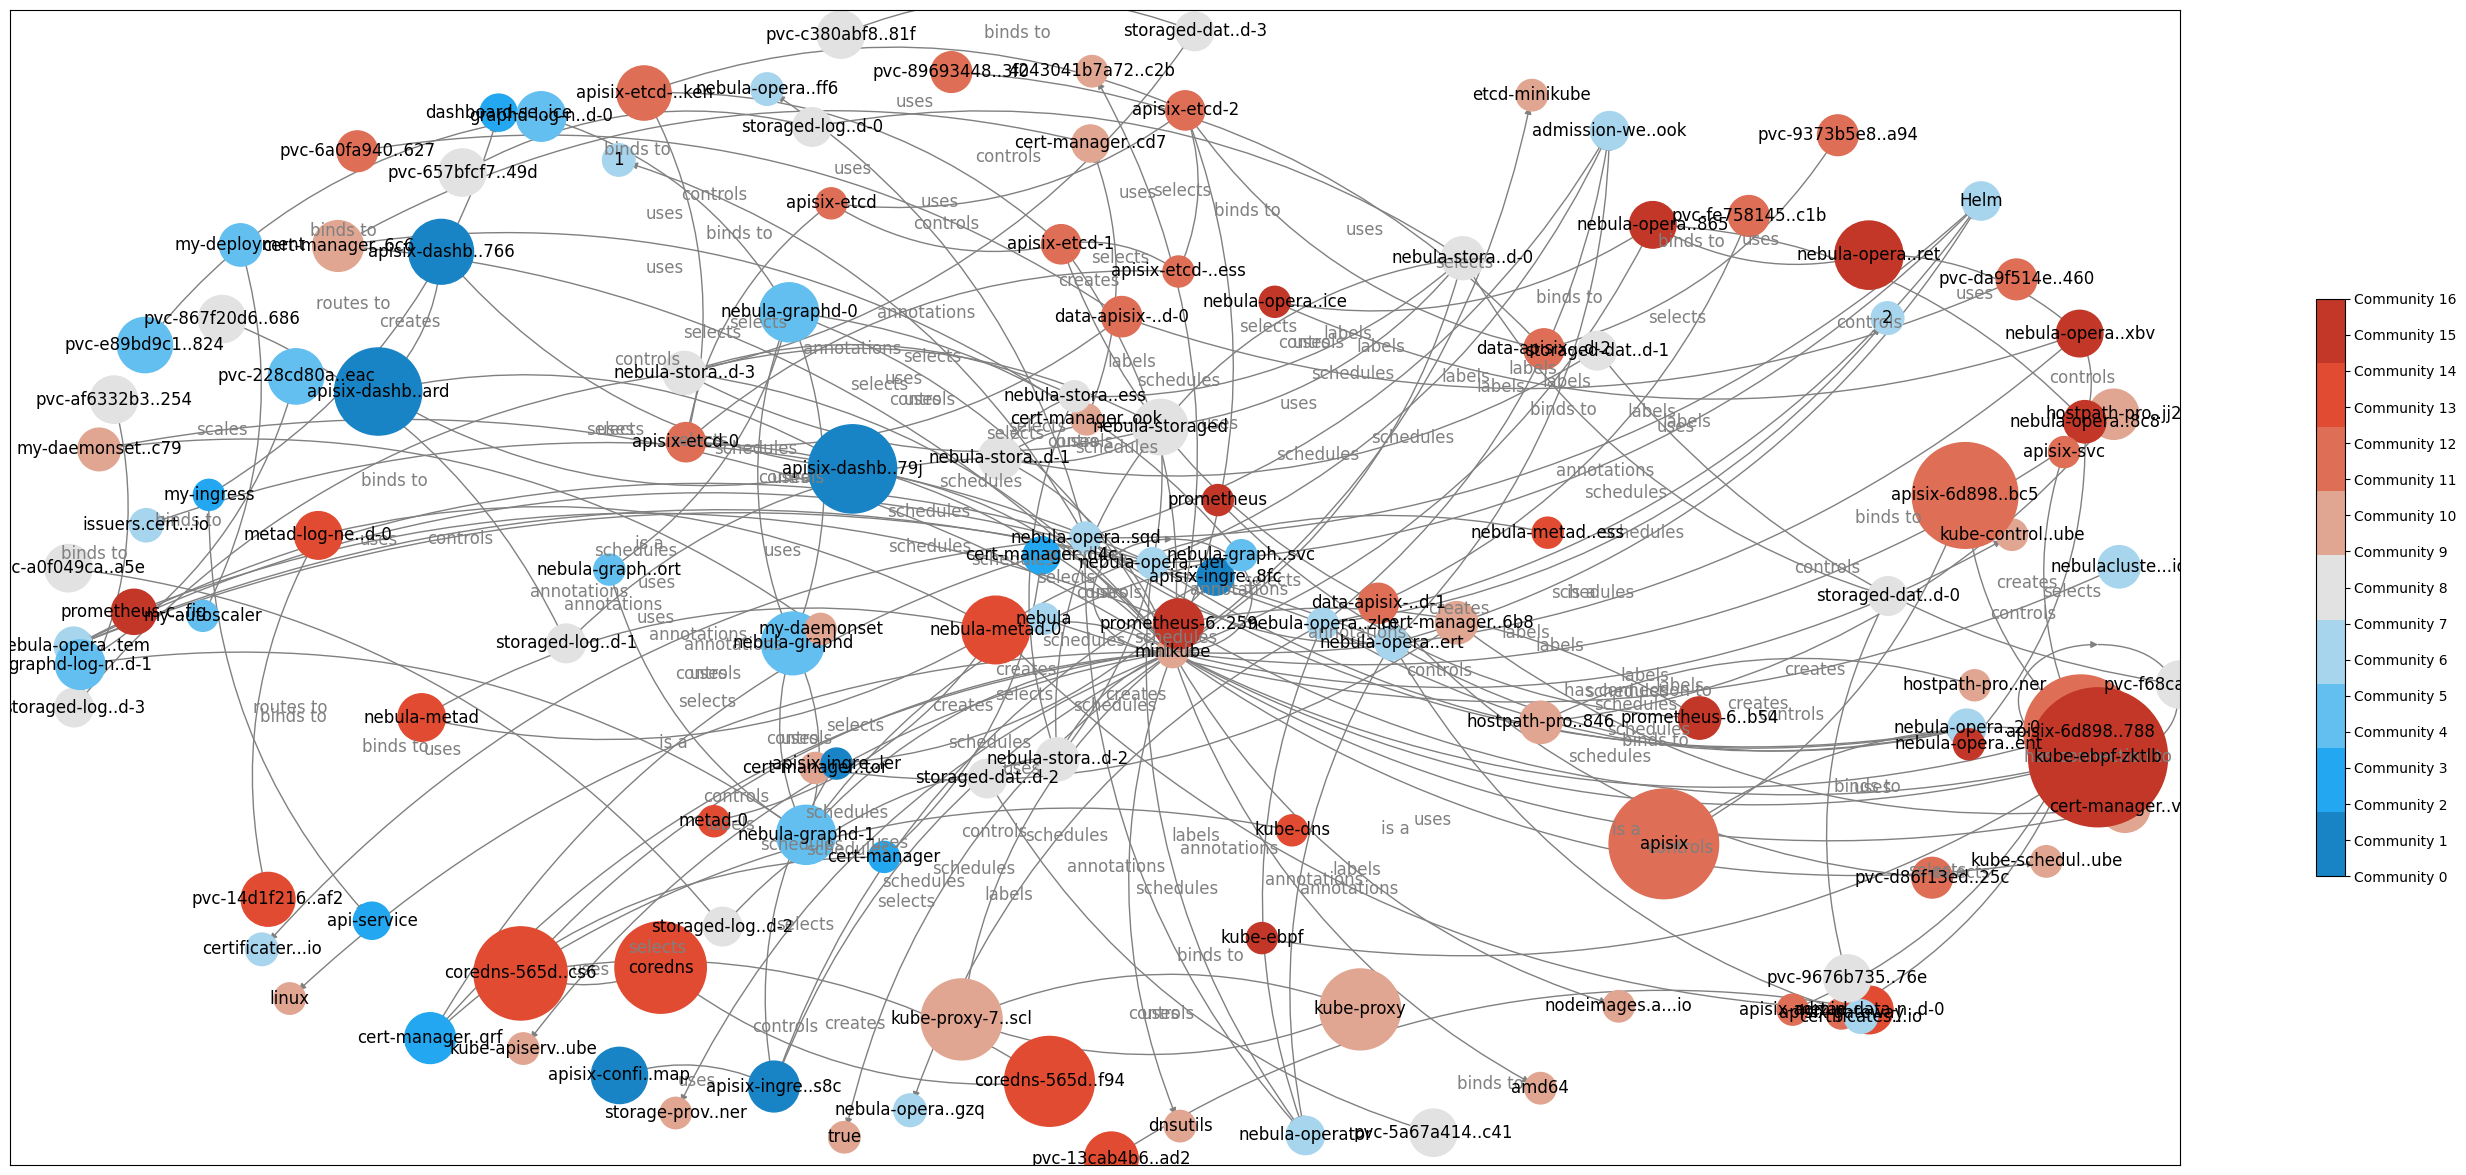

In [6]:
from matplotlib.colors import ListedColormap


def draw_graph_algo(G, importance, community_partition, colors=["#1984c5", "#22a7f0", "#63bff0", "#a7d5ed", "#e2e2e2", "#e1a692", "#de6e56", "#e14b31", "#c23728"]):
    # Define positions for the nodes
    pos = nx.spring_layout(G, k=0.5)

    # Create a figure and set the axis limits
    fig, ax = plt.subplots(figsize=(35, 15))
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)

    # Create a colormap from the colors list
    cmap = ListedColormap(colors)

    # Draw the nodes and edges of the graph
    node_colors = [community_partition[node] for node in G.nodes()]
    node_sizes = [500 + 9500 * (importance[node] - min(importance.values())) / (max(importance.values()) - min(importance.values())) for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos=pos, ax=ax, node_color=node_colors, node_size=node_sizes, cmap=cmap, vmin=0, vmax=max(community_partition.values()))

    nx.draw_networkx_edges(G, pos=pos, ax=ax, edge_color='gray', width=1, connectionstyle='arc3, rad=0.2', arrowstyle='-|>', arrows=True)

    # Extract edge labels as a dictionary
    edge_labels = nx.get_edge_attributes(G, 'verb')

    # Add edge labels to the graph
    for edge, label in edge_labels.items():
        ax.text((pos[edge[0]][0] + pos[edge[1]][0])/2,
                (pos[edge[0]][1] + pos[edge[1]][1])/2,
                label, fontsize=12, color='gray', ha='center', va='center')

    # Add node labels to the graph
    # node_labels = {n: G.nodes[n]['label'] if 'label' in G.nodes[n] else n for n in G.nodes()}
    max_label_length = 15
    node_ids = {n: n[:max_label_length - 3] + '..' + n[-3:] if len(n) > max_label_length else n for n in G.nodes()}
    nx.draw_networkx_labels(G, pos=pos, ax=ax, labels=node_ids, font_size=12, font_color='black')

    # Add colorbar for community colors
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=max(community_partition.values())))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, ticks=range(max(community_partition.values()) + 1), shrink=0.5)
    cbar.ax.set_yticklabels([f'Community {i}' for i in range(max(community_partition.values()) + 1)])

    # Show the figure
    plt.show()


draw_graph_algo(G, importance=pr_result, community_partition=louvain_result)

In [7]:
g.algo.get_all_algo()

['pagerank',
 'connected_components',
 'louvain',
 'label_propagation',
 'k_core',
 'k_truss',
 'k_clique_communities',
 'degree_statics',
 'betweenness_centrality',
 'clustering_coefficient',
 'bfs',
 'dfs',
 'node2vec',
 'jaccard',
 'weakly_connected_components',
 'strongly_connected_components',
 'triangle_count',
 'closeness_centrality']

In [8]:
betweenness_centrality_result = g.algo.betweenness_centrality()

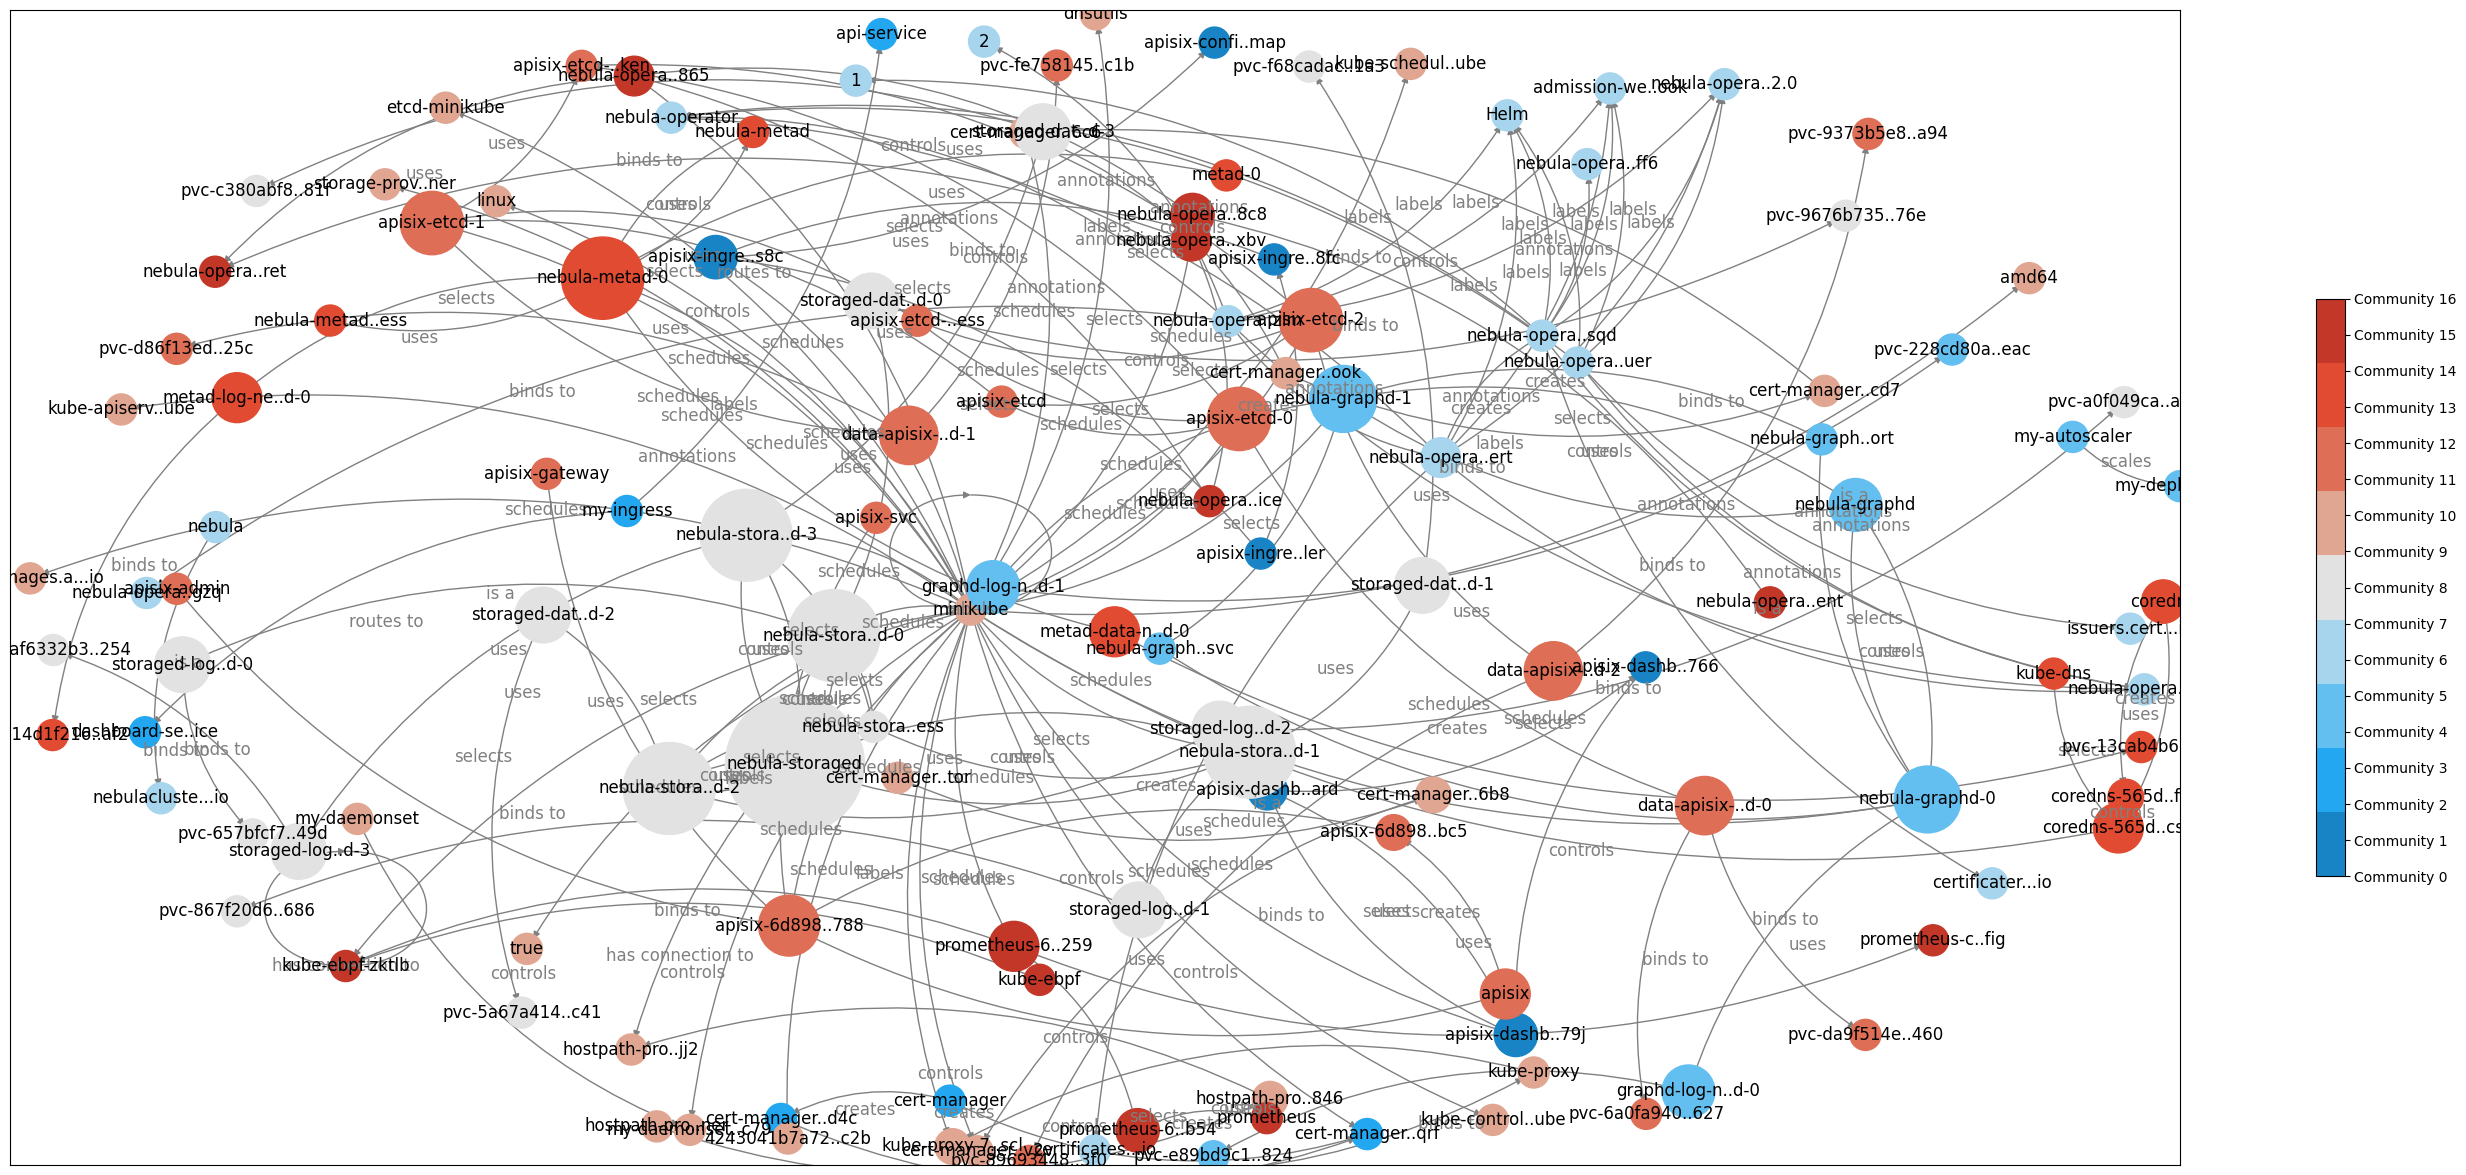

In [9]:
draw_graph_algo(G, importance=betweenness_centrality_result, community_partition=louvain_result)